### Optimisasi

In [1]:
import scipy as scipy

In [2]:
from scipy.optimize import minimize_scalar

In [3]:
def f(x) :
    return 2*x**2 + 4*x - 1

opt = minimize_scalar(f)
opt

     fun: -3.0
    nfev: 9
     nit: 4
 success: True
       x: -1.0000000000000002

## Turunan Parsial

1. Gradien = vektor yang isinya turunan parsial pertama x dan y. Simbolnya tabla
2. Hessian = matriks. yang sumbu x nya dox() doy().sumbu y nya dox doy.

- Gradien bakal sering ketemu di deep learning & machine learning. Untuk optimasi.
- Hessian bakal sering di deep learning

Jacobian : mirip hessian. matrix. sumbu x nya dox doy. sumbu y nya f1 f2 f3. ada 3 fungsi.

In [4]:
import sympy as sy

In [6]:
x,y,z = sy.symbols('x y z')
f = 4*x*y + x*sy.sin(z) + x**3 + z**8*y
f

x**3 + 4*x*y + x*sin(z) + y*z**8

In [7]:
x = sy.Symbol('x')
y = sy.Symbol('y')
z = sy.Symbol('z')

In [8]:
#Turunan parsial terhadap x
sy.diff(f,x)

3*x**2 + 4*y + sin(z)

In [10]:
#Turunan parsial terhadap x
f.diff(x)

3*x**2 + 4*y + sin(z)

In [9]:
#Turunan parsial terhadap y
sy.diff(f,y)

4*x + z**8

In [11]:
#Turunan parsial terhadap y
f.diff(y)

4*x + z**8

### Gradien

ini bentuknya vektor. vektor yang isinya turunan parsial dari suatu fungsi

In [12]:
from sympy.tensor.array import derive_by_array

In [14]:
grad = derive_by_array(f, (x,y,z))
grad

[3*x**2 + 4*y + sin(z), 4*x + z**8, x*cos(z) + 8*y*z**7]

In [19]:
type(grad)

sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray

### Jacobian

Establish fungsi dalam matriks dulu

In [16]:
f_jacob = sy.Matrix([x*y+y, 2*x*y-2])
f_jacob

Matrix([
[  x*y + y],
[2*x*y - 2]])

turunkan parsial itu matriksnya

In [18]:
par = sy.Matrix([x,y])
f_jacob.jacobian(par)

Matrix([
[  y, x + 1],
[2*y,   2*x]])

jacobian tidak bisa digunakan pada persamaan yang belum di unpack

### Hessian

***Alert***
1. Kita bisa menghitung Hessian dari Gradien.

*anyway simply, hessian itu gradien yang bentuknya kaya si jacobian*

In [20]:
f

x**3 + 4*x*y + x*sin(z) + y*z**8

In [21]:
sy.hessian(f, (x, y, z))

Matrix([
[   6*x,      4,                cos(z)],
[     4,      0,                8*z**7],
[cos(z), 8*z**7, -x*sin(z) + 56*y*z**6]])

### Turunan Parsial Numerik

In [22]:
import numpy as np
def f(x,y):
    return x**2*y + 2*x**3*y + y**4

x = np.linspace(1,10)
y = np.linspace(1,10)

z = np.array([[f(i,j) for i in x] for j in y])

dx, dy = np.gradient(z)

In [23]:
z.shape

(50, 50)

In [24]:
print(dx)

[[   1.51405365    1.82959221    2.2455377  ...  346.33846043
   366.13673811  386.67731896]
 [   1.79879288    2.11433144    2.53027693 ...  346.62319966
   366.42147734  386.96205819]
 [   2.46311416    2.77865272    3.19459822 ...  347.28752094
   367.08579863  387.62637947]
 ...
 [ 657.45523618  657.77077474  658.18672024 ... 1002.27964296
  1022.07792064 1042.61850149]
 [ 695.74408466  696.05962322  696.47556871 ... 1040.56849144
  1060.36676912 1080.90734997]
 [ 715.25004974  715.5655883   715.98153379 ... 1060.07445652
  1079.8727342  1100.41331505]]


In [26]:
print(dy)

[[   1.71793215    1.99126214    2.57510051 ...  105.80708718
   109.81133711  111.83205127]
 [   2.03347071    2.35700417    3.04807816 ...  125.24104197
   129.98076638  132.37263212]
 [   2.34900927    2.7227462     3.5210558  ...  144.67499676
   150.15019564  152.91321296]
 ...
 [  16.54824442   19.18113739   24.80504982 ... 1019.20296225
  1057.7745126  1077.23935102]
 [  16.86378298   19.54687942   25.27802746 ... 1038.63691704
  1077.94394186 1097.77993187]
 [  17.17932154   19.91262144   25.75100511 ... 1058.07087183
  1098.11337113 1118.32051271]]


plot z, dx, dy yang dianggap sebagai sebuah gambar

Text(0.5, 1.0, 'dy')

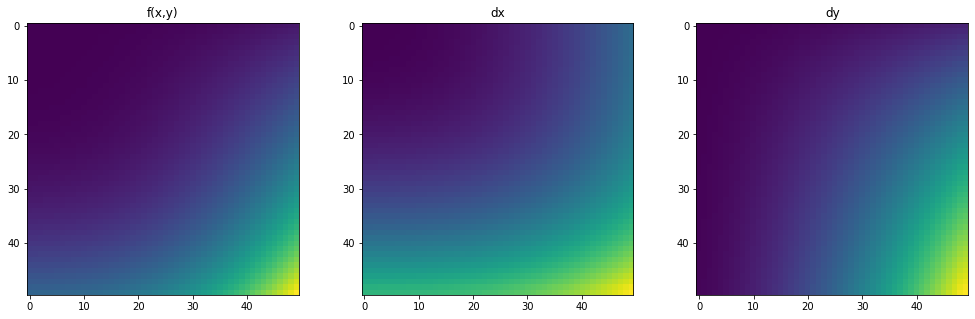

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols = 3, figsize = (17,5))
ax[0].imshow(z)
ax[0].set_title('f(x,y)')
ax[1].imshow(dx)
ax[1].set_title('dx')
ax[2].imshow(dy)
ax[2].set_title('dy')

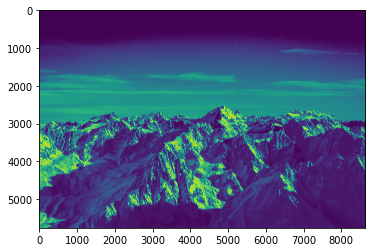

In [31]:
gambar = plt.imread('this.jpg')
plt.imshow(gambar[:,:,0])

Text(0.5, 1.0, 'dy')

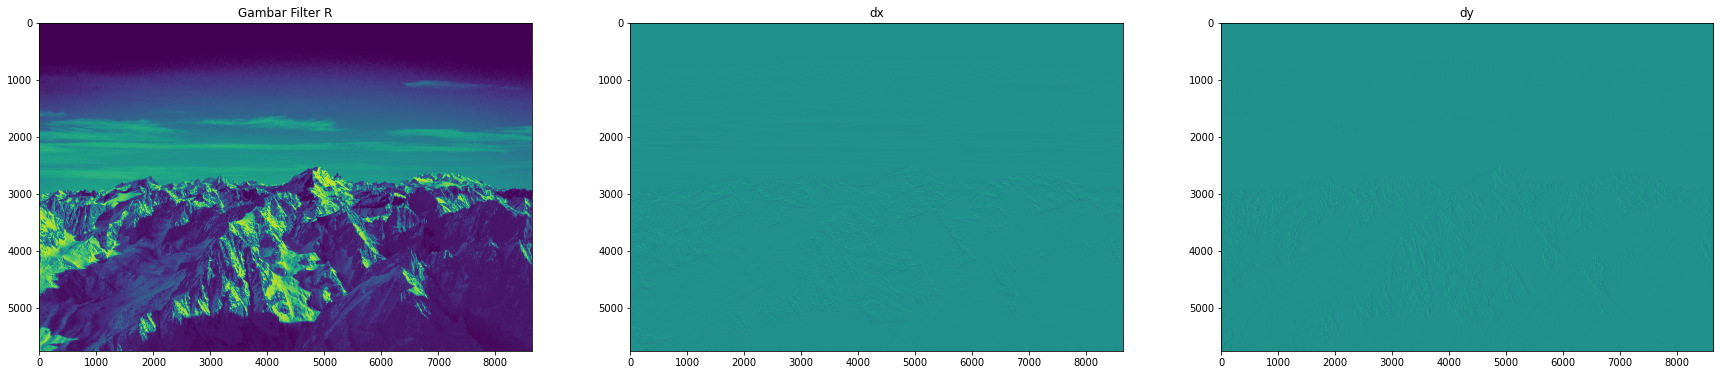

In [35]:
R = gambar[:,:,0]
R_dx, R_dy = np.gradient(R)

fig, ax = plt.subplots(ncols=3, figsize=(30,8))
ax[0].imshow(R)
ax[0].set_title('Gambar Filter R')
ax[1].imshow(R_dx)
ax[1].set_title('dx')
ax[2].imshow(R_dy)
ax[2].set_title('dy')